In [110]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test', 'training', 'SampleSubmission.csv', 'IdLookupTable.csv']


In [111]:
print(os.listdir("../input/training"))
print(os.listdir("../input/test"))

['training.csv']
['test.csv']


In [112]:
train = pd.read_csv('../input/training/training.csv')

In [113]:
train.head().T

,0,1,2,3,4
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949


In [114]:
#train['Image'][0]
print('size of traning data {}'.format(len(train)))
print('Missing vlaue col ')
print(train.isnull().any().value_counts())
train.isnull().sum().sort_values(ascending=False)

size of traning data 7049
Missing vlaue col 
True     28
False     3
dtype: int64


left_eyebrow_outer_end_y     4824
left_eyebrow_outer_end_x     4824
right_eyebrow_outer_end_y    4813
right_eyebrow_outer_end_x    4813
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
mouth_left_corner_y          4780
mouth_left_corner_x          4780
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
right_eyebrow_inner_end_y    4779
right_eyebrow_inner_end_x    4779
mouth_right_corner_x         4779
mouth_right_corner_y         4779
left_eye_inner_corner_y      4778
left_eye_inner_corner_x      4778
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_y      33
mouth_center_bottom_lip_x      33
right_eye_center_y             13
right_eye_center_x             13
left_eye_center_y              10
left_eye_center_x              10
nose_tip_x                      0
nose_tip_y    

In [115]:
#ffill which fills the place with value in the Forward index or Previous/Back respectively.

train.fillna(method='ffill',inplace=True)
#check missig col
train.isnull().any().value_counts()

False    31
dtype: int64

In [116]:
len(train)

7049

In [117]:
# convert image col to int  also check NaN
image_list=[]

for i in train['Image']:
    i=i.split(' ')
    image_list.append(i)
len(image_list)



7049

In [118]:
len(image_list[0])


9216

In [119]:
#covert to arry
image_list = np.array(object=image_list,dtype=float)

In [120]:
images=image_list.reshape(-1,96,96,1)

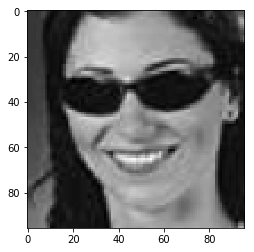

In [121]:
plt.imshow(image_list.reshape(-1,96,96)[3010],cmap='gray')



In [122]:
IMAGE_HEIGHT=96
IMAGE_WIDTH=96
#Ytrain.iloc[3010][Ytrain.iloc[3010].index[1]]
#np.dtype(Ytrain.iloc[3010]['left_eye_center_y'])
def img_show(image_list,train):
    fig,axes = plt.subplots(nrows=5,ncols=2,dpi=300,figsize=(12,12))

    for row in range(5):
        for col in range(1):
            #random number  generator for diff image
            j  =np.random.randint(0,len(train))
            X = image_list.reshape(-1,96,96)[j]
            Y = train

            Y=Y.iloc[j]# location of Y
            img = np.copy(X) #copy image
            for i in range(0,30,2):
            #print(Y[Y.index[i+1]])
                   if 0 < Y[Y.index[i]] < IMAGE_WIDTH and  0 < Y[Y.index[i+1]] < IMAGE_HEIGHT:
                    img[int(Y[Y.index[i+1]]),int(Y[Y.index[i]])] = 255
            axes[row,col].imshow(img,cmap='gray')
            axes[row,col+1].imshow(X,cmap='gray')
            #remove axies
            axes[row,col].axis('off')
            axes[row,col+1].axis('off')

    plt.tight_layout()


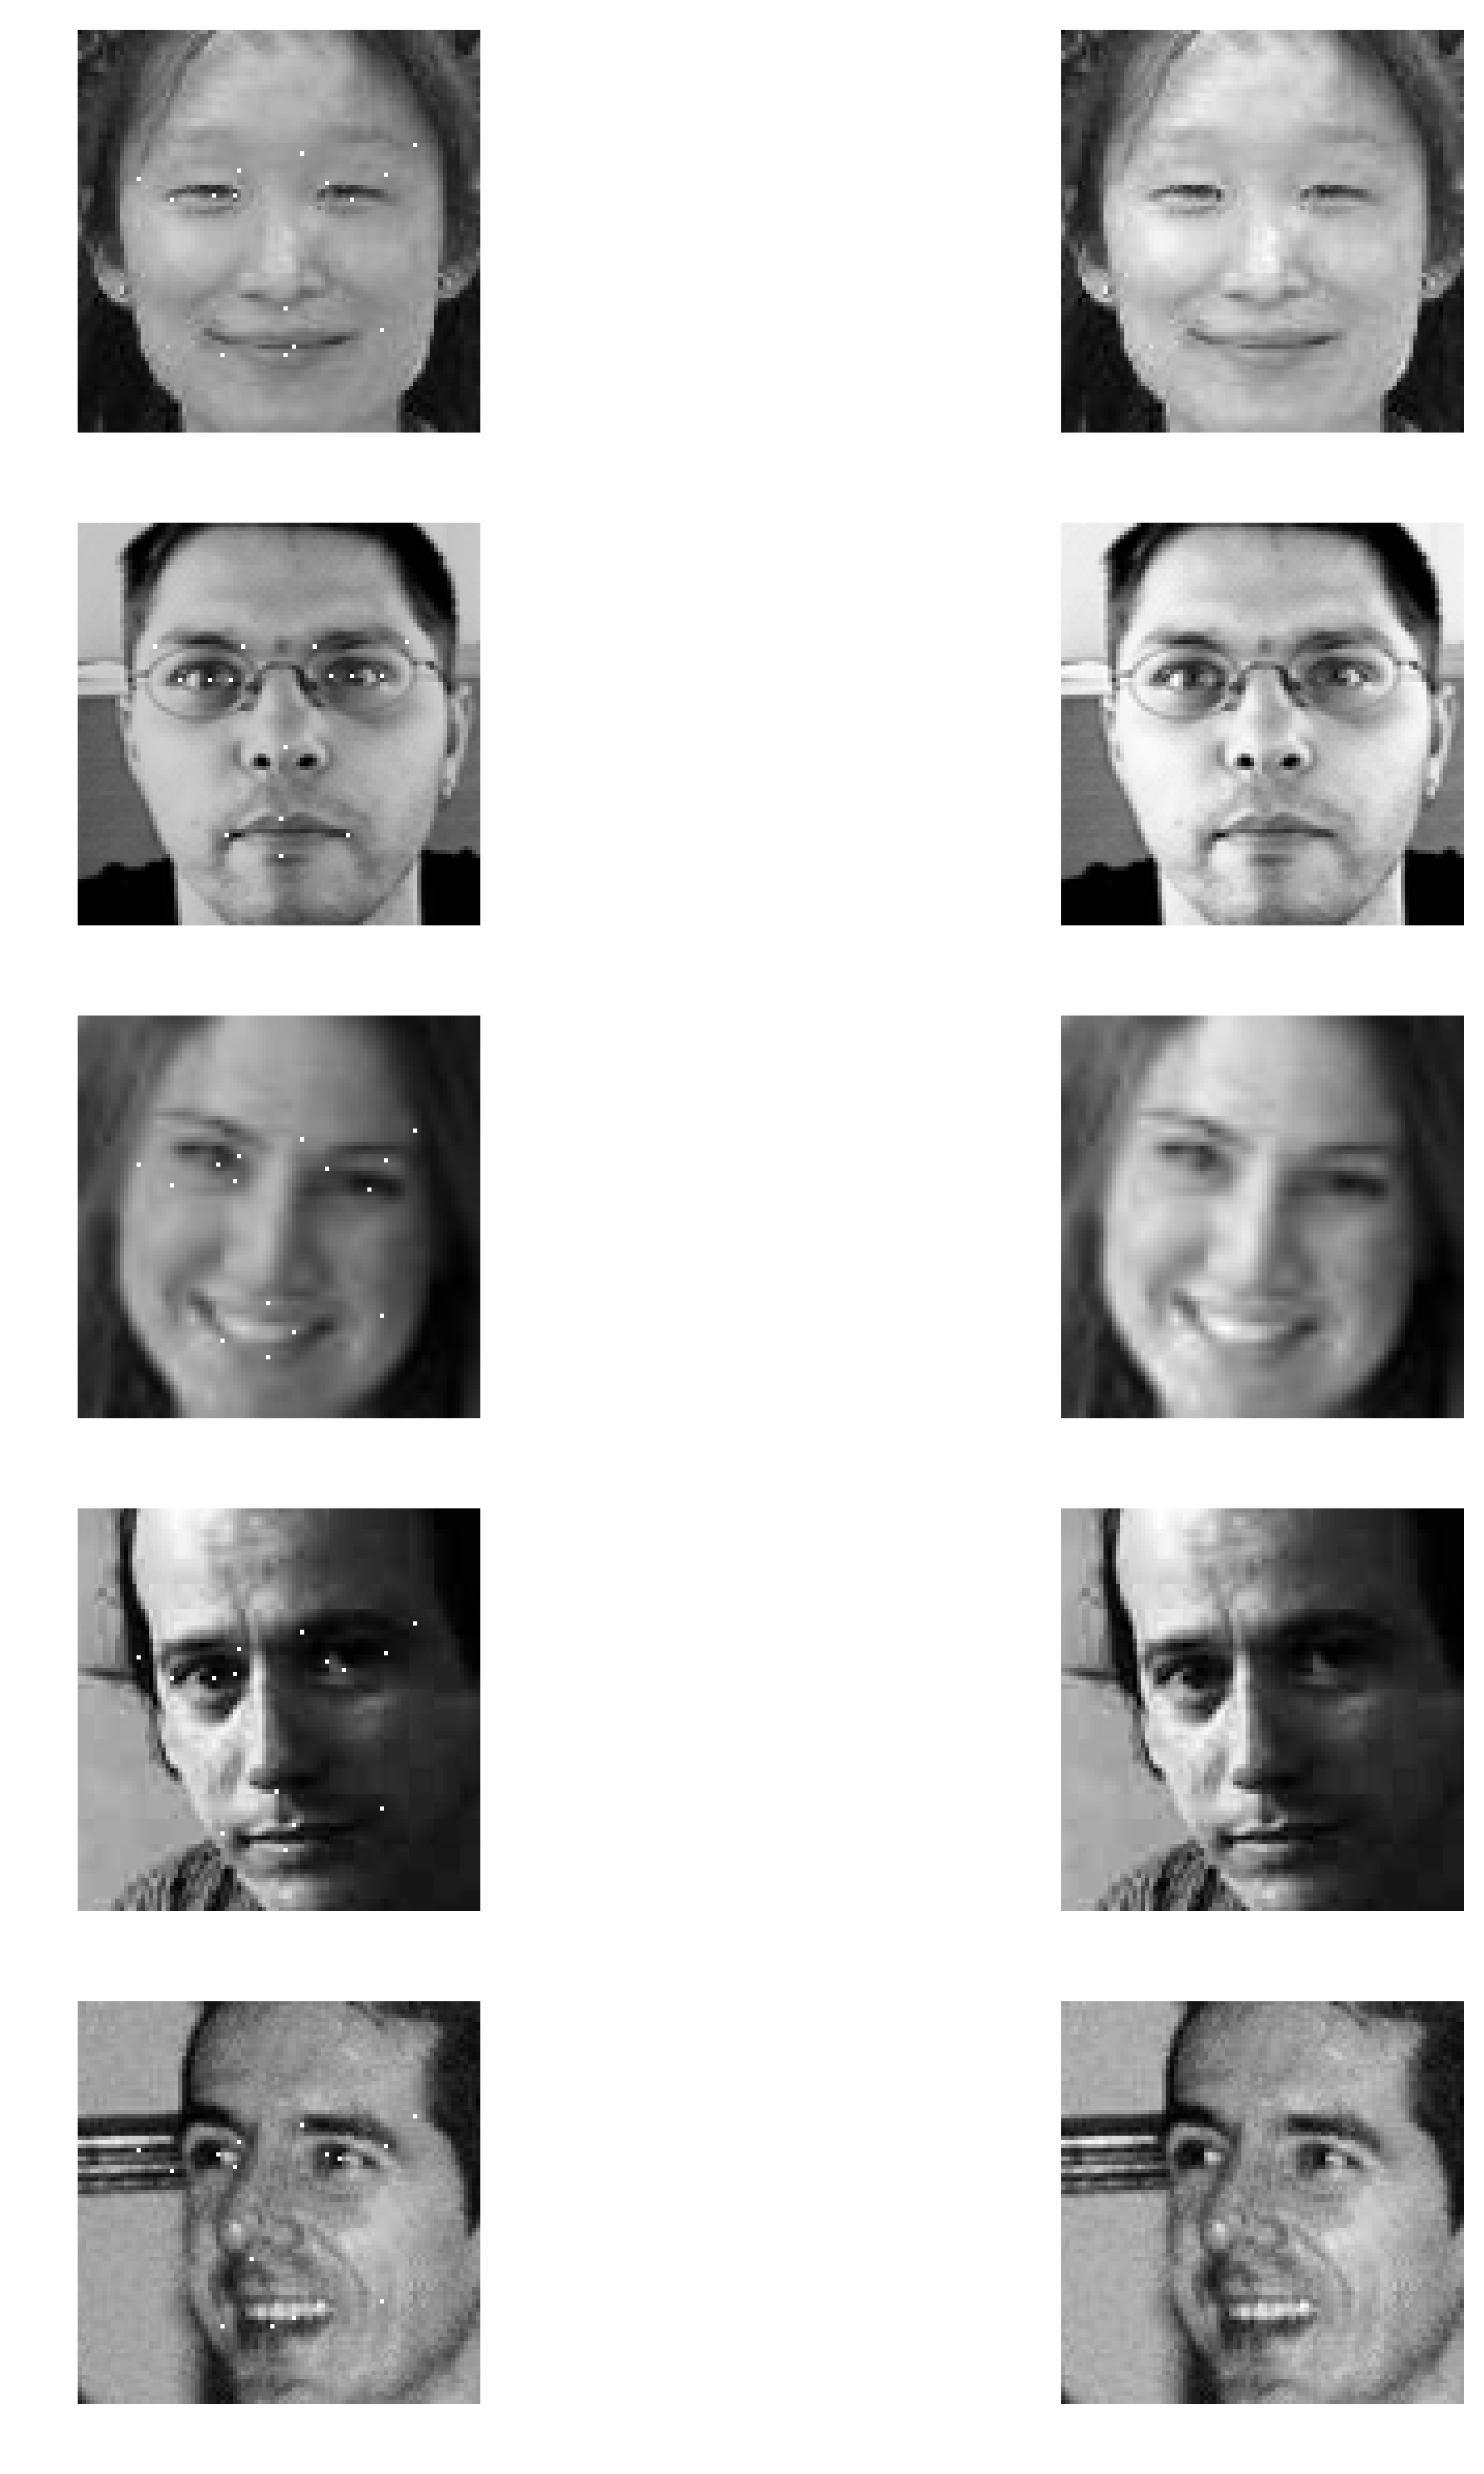

In [123]:
img_show(image_list,train.drop(labels='Image',axis=1))

In [124]:
y_train=train.drop(labels='Image',axis=1)
y_train.shape

(7049, 30)

In [125]:
X_train=images
X_train.shape
#lenght of tensor has 4 index

(7049, 96, 96, 1)

In [ ]:
X_train=X_train/255
X_train[1]

In [207]:

import tensorflow as tf
model= tf.keras.models.Sequential(
    
    layers=[
        
         #convolution 1st time
        tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation=tf.nn.relu,input_shape=(96,96,1)),
        tf.keras.layers.MaxPool2D(2,2),
     
         #convolution 2nd time
        tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation=tf.nn.relu,input_shape=(96,96,1)),
        tf.keras.layers.MaxPool2D(2,2),
       
         #convolution 2nd time
        tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation=tf.nn.relu,input_shape=(96,96,1)),
        tf.keras.layers.MaxPool2D(2,2),
      
        #input layer
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=526,activation='relu'),
        tf.keras.layers.Dense(units=526,activation='relu'),
        tf.keras.layers.Dropout(0.3),
        

        # number of keypoint
        tf.keras.layers.Dense(units=30,activation='relu')
    ]
)

In [208]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 94, 94, 32)        320       
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 45, 45, 32)        9248      
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 6400)              0         
__________

In [209]:
model.compile(optimizer='adam',
             loss='mse',
              metrics=['acc'])

In [210]:
hist=model.fit(x=X_train,y=y_train,batch_size=128,epochs=200,verbose=2,validation_split=0.2)
hist

Train on 5639 samples, validate on 1410 samples
Epoch 1/200
 - 2s - loss: 1353.2681 - acc: 0.1944 - val_loss: 208.7328 - val_acc: 0.6447
Epoch 2/200
 - 1s - loss: 188.0363 - acc: 0.2818 - val_loss: 127.6696 - val_acc: 0.6879
Epoch 3/200
 - 1s - loss: 133.5114 - acc: 0.3304 - val_loss: 77.1378 - val_acc: 0.6716
Epoch 4/200
 - 1s - loss: 111.3124 - acc: 0.3421 - val_loss: 76.4849 - val_acc: 0.6830
Epoch 5/200
 - 1s - loss: 96.2838 - acc: 0.3660 - val_loss: 73.0928 - val_acc: 0.6716
Epoch 6/200
 - 1s - loss: 88.6294 - acc: 0.3891 - val_loss: 76.9228 - val_acc: 0.6745
Epoch 7/200
 - 1s - loss: 87.6509 - acc: 0.4098 - val_loss: 70.7069 - val_acc: 0.6816
Epoch 8/200
 - 1s - loss: 76.0076 - acc: 0.4237 - val_loss: 94.6518 - val_acc: 0.6787
Epoch 9/200
 - 1s - loss: 78.9908 - acc: 0.4336 - val_loss: 93.0120 - val_acc: 0.6766
Epoch 10/200
 - 1s - loss: 71.9170 - acc: 0.4558 - val_loss: 71.1568 - val_acc: 0.6794
Epoch 11/200
 - 1s - loss: 65.5898 - acc: 0.4673 - val_loss: 59.8549 - val_acc: 0.67

Epoch 95/200
 - 1s - loss: 13.2429 - acc: 0.7303 - val_loss: 18.2189 - val_acc: 0.7213
Epoch 96/200
 - 1s - loss: 15.2974 - acc: 0.7336 - val_loss: 15.4078 - val_acc: 0.7163
Epoch 97/200
 - 1s - loss: 14.2538 - acc: 0.7397 - val_loss: 16.2527 - val_acc: 0.7149
Epoch 98/200
 - 1s - loss: 13.1834 - acc: 0.7423 - val_loss: 14.1588 - val_acc: 0.7255
Epoch 99/200
 - 1s - loss: 12.9199 - acc: 0.7406 - val_loss: 27.0791 - val_acc: 0.7184
Epoch 100/200
 - 1s - loss: 14.2638 - acc: 0.7469 - val_loss: 14.3167 - val_acc: 0.7220
Epoch 101/200
 - 1s - loss: 14.0110 - acc: 0.7374 - val_loss: 13.8391 - val_acc: 0.7149
Epoch 102/200
 - 1s - loss: 12.9139 - acc: 0.7429 - val_loss: 20.5142 - val_acc: 0.7376
Epoch 103/200
 - 1s - loss: 13.4138 - acc: 0.7413 - val_loss: 13.7722 - val_acc: 0.7128
Epoch 104/200
 - 1s - loss: 13.2918 - acc: 0.7434 - val_loss: 13.2512 - val_acc: 0.7149
Epoch 105/200
 - 1s - loss: 12.7565 - acc: 0.7453 - val_loss: 11.7618 - val_acc: 0.7121
Epoch 106/200
 - 1s - loss: 12.2956 -

Epoch 190/200
 - 1s - loss: 8.5960 - acc: 0.8035 - val_loss: 11.7841 - val_acc: 0.7291
Epoch 191/200
 - 1s - loss: 12.1572 - acc: 0.7750 - val_loss: 5.5800 - val_acc: 0.7333
Epoch 192/200
 - 1s - loss: 9.2645 - acc: 0.7812 - val_loss: 5.5952 - val_acc: 0.7277
Epoch 193/200
 - 1s - loss: 9.2177 - acc: 0.7865 - val_loss: 9.0004 - val_acc: 0.7298
Epoch 194/200
 - 1s - loss: 9.1488 - acc: 0.7906 - val_loss: 10.8652 - val_acc: 0.7213
Epoch 195/200
 - 1s - loss: 9.9198 - acc: 0.7819 - val_loss: 7.3281 - val_acc: 0.7411
Epoch 196/200
 - 1s - loss: 9.4580 - acc: 0.8017 - val_loss: 4.0622 - val_acc: 0.7468
Epoch 197/200
 - 1s - loss: 8.5430 - acc: 0.8014 - val_loss: 3.7877 - val_acc: 0.7504
Epoch 198/200
 - 1s - loss: 8.3446 - acc: 0.7989 - val_loss: 4.2386 - val_acc: 0.7433
Epoch 199/200
 - 1s - loss: 8.7175 - acc: 0.8037 - val_loss: 8.7285 - val_acc: 0.7255
Epoch 200/200
 - 1s - loss: 8.4270 - acc: 0.8111 - val_loss: 4.6070 - val_acc: 0.7270


In [211]:
from sklearn.metrics import r2_score



In [212]:
y_pred =model.predict(X_train)

score = r2_score(y_train,y_pred)
score

0.4467654174918197

**Overfitting** if: training loss << validation loss

**Underfitting** if: training loss >> validation loss or Underfitting – Validation and training error high

**Good fit** if training loss ~ validation loss(Validation error low, slightly higher than the training error)

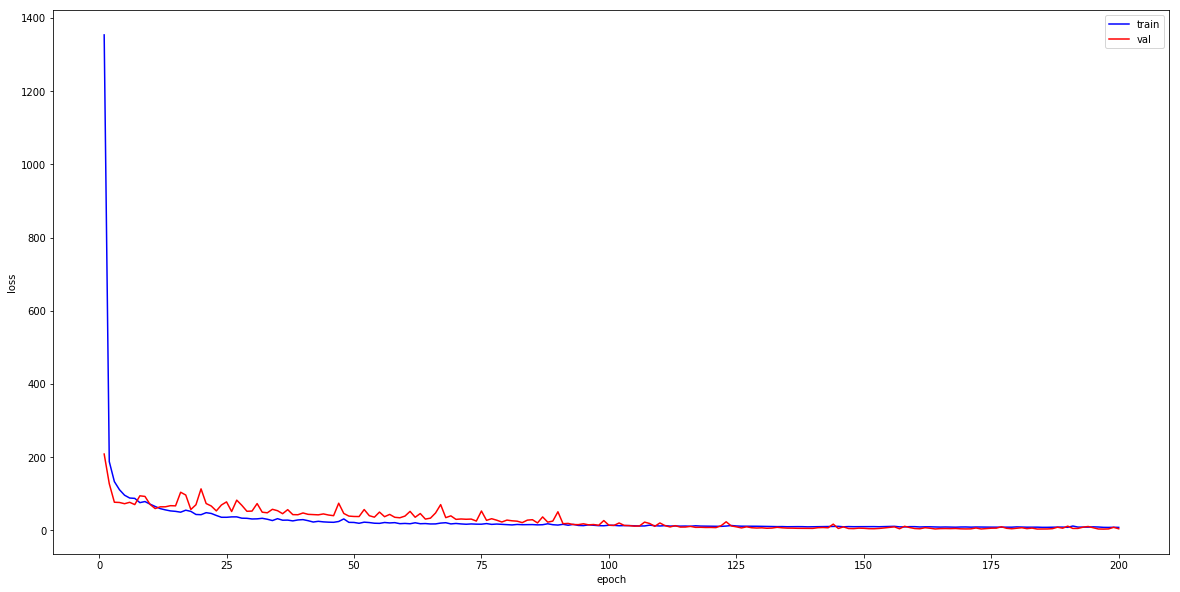

In [213]:

plt.figure(figsize=(20,10))
loss=hist.history['loss']
val_loss=hist.history['val_loss']
y=np.arange(1,201)
plt.plot(y,loss,'b',label='train')
plt.plot(y,val_loss,'r',label='val')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend()

plt.legend()

In [214]:
test = pd.read_csv('../input/test/test.csv')

In [215]:
y=np.arange(1,501)

In [216]:
# convert image col to int  also check NaN
image_list=[]

for i in test['Image']:
    i=i.split(' ')
    image_list.append(i)
len(image_list)

1783

In [217]:
image_list=np.array(image_list,dtype=float)
images=image_list.reshape(-1,96,96,1)
X_test =images/255.0


In [218]:
predicted_value =model.predict(X_test)

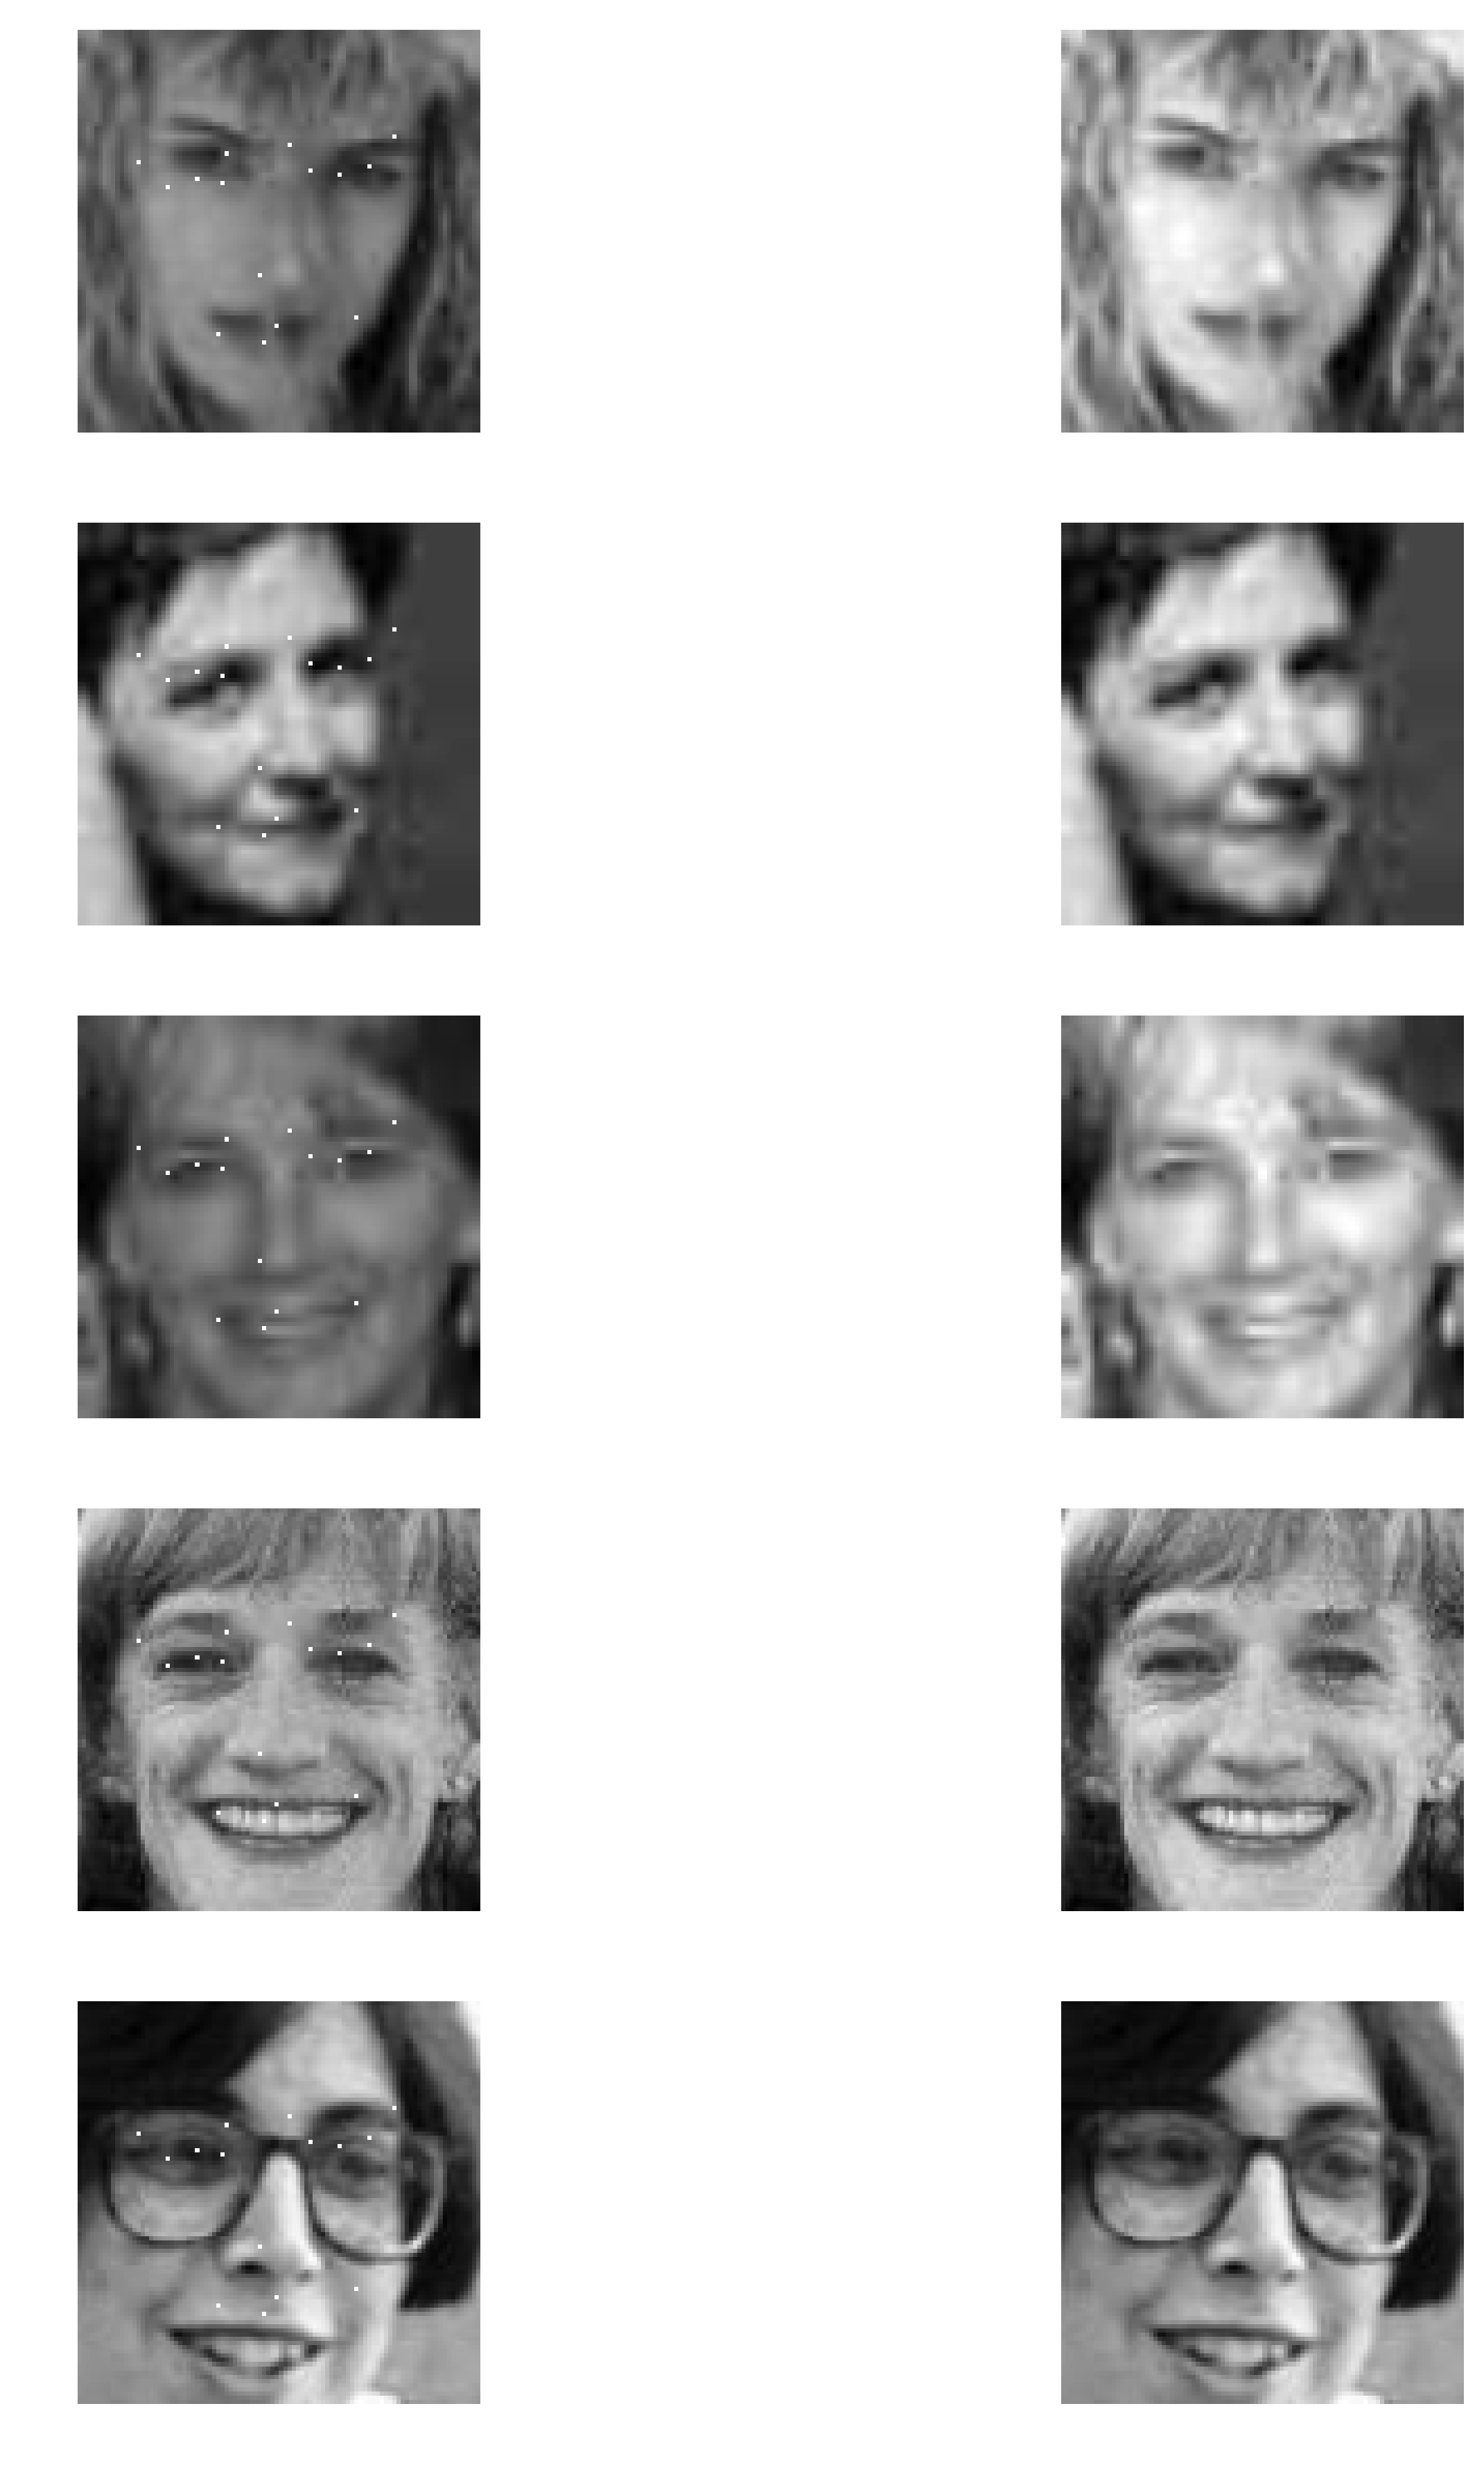

In [219]:
pv =pd.DataFrame(data=predicted_value)
img_show(image_list,pv)

In [220]:
pred = model.predict(X_test)
lookid_data = pd.read_csv('../input/IdLookupTable.csv')
lookid_list = list(lookid_data['FeatureName'])
imageID = list(lookid_data['ImageId']-1)
pre_list = list(pred)
rowid = lookid_data['RowId']
rowid=list(rowid)
feature = []
for f in list(lookid_data['FeatureName']):
    feature.append(lookid_list.index(f))
preded = []
for x,y in zip(imageID,feature):
    preded.append(pre_list[x][y])
rowid = pd.Series(rowid,name = 'RowId')

loc = pd.Series(preded,name = 'Location')

submission = pd.concat([rowid,loc],axis = 1)
submission.to_csv('submision.csv',index = False)

In [221]:
df=pd.read_csv('submision.csv')

In [222]:
df

,RowId,Location
0,1,62.329414
1,2,34.930508
2,3,28.368181
3,4,35.216862
4,5,55.381672
5,6,33.577736
6,7,69.372742
7,8,32.411152
8,9,34.960140
9,10,36.356041
